In [1]:
wdir='./' ## working dir
gColab=True  ## set this to False if running locally
if(gColab):
    ## Mount google drive to the machine running this nb
    from google.colab import drive
    drive.mount('/content/drive')
    ## must also specify the absolute path to the working dir
    wdir='/content/drive/MyDrive/ysNN/partA/'

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.math import maximum as tfmax
import tensorflow as tf
import os,sys
sys.path.append(os.path.abspath(wdir))
import ysnnutil as yut
#frmt='png'     ### format for saving figures
frmt='pdf'
nb='nb15'
wFile=wdir+nb+'_fitSHYqp'
fSxySections=wdir+nb+'_SxySections.'+frmt
fSigmaT=wdir+nb+'_SigmaT.'+frmt
fRvalT=wdir+nb+'_rValT.'+frmt
fSigmaC=wdir+nb+'_SigmaC.'+frmt
fRvalC=wdir+nb+'_rValC.'+frmt
fOrtoSymm=wdir+nb+'_OrthoSymm.'+frmt
fConvex=wdir+nb+'_Convex.'+frmt

In [3]:
def pwAct10(x):
    return (x**9)*tf.math.maximum(0.0,x)
nnHom=10
nun=60
model=keras.Sequential([
layers.Dense(nun,activation=pwAct10,use_bias=False),
layers.Dense(1,use_bias=False)
])

model.load_weights(wFile, skip_mismatch=False, by_name=False, options=None)

In [4]:
### Magnesium alloy SHYqp model with q=14,p=13
deg,vCoeff=yut.getCoeff(wdir+'AZ31B_Lou2007_TXT2B_SHYqp_deg14_Err_and_Coeff.txt')
maxSXY=1.0/(np.sqrt(3.0)*(1.0+vCoeff[-1]))
nQ,nP=yut.nMonoms(deg)
ddMon=yut.vPoly(deg)

degQ =  14


i =  0  sxy =  0.0


<ipython-input-5-501e83ca35f8>:21: UserWarning: The following kwargs were not used by contour: 'rasterized'
  ax2.contour(vsx,vsy,tf.reshape(vz,(npt,npt)),levels=[1.0],linewidths=2,colors=['r'],rasterized=True)
<ipython-input-5-501e83ca35f8>:22: UserWarning: The following kwargs were not used by contour: 'rasterized'
  ax2.contour(vsx,vsy,vzSHY.reshape((npt,npt)),levels=[1.0],linewidths=2,linestyles='--',colors=['k'],rasterized=True)


i =  1  sxy =  0.10657174982499601
i =  2  sxy =  0.159857624737494
i =  3  sxy =  0.21314349964999202
i =  4  sxy =  0.26642937456249
i =  5  sxy =  0.319715249474988
i =  6  sxy =  0.37300112438748595
i =  7  sxy =  0.42628699929998404
i =  8  sxy =  0.479572874212482
i =  9  sxy =  0.5195372803968554
i =  10  sxy =  0.5275301616337302
i =  11  sxy =  0.5317930316267301


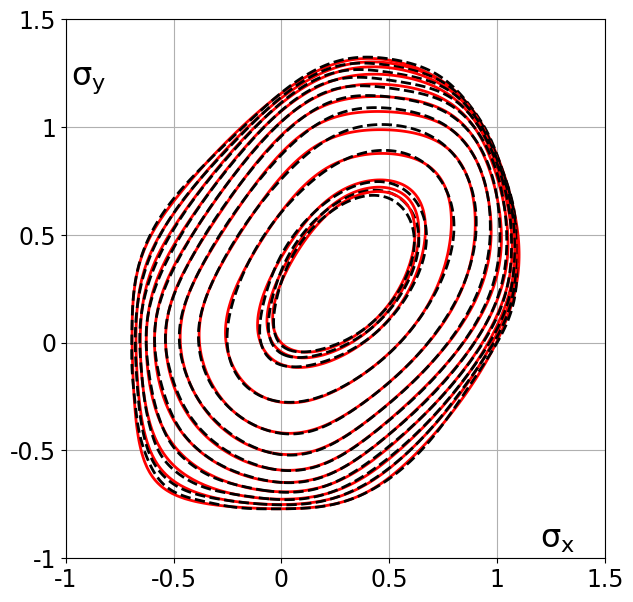

In [5]:
npt=200
vsx=np.linspace(-1.0,1.5,npt)
vsy=np.linspace(-1.0,1.5,npt)
###maxSXY=0.5
#vsxy=[0.0]
vsxy=maxSXY*np.array([0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.975,0.99,0.998])
X,Y=np.meshgrid(vsx,vsy)
npt2=npt*npt
X,Y=X.reshape((npt2,1)),Y.reshape((npt*npt,1))
vp=np.zeros((npt*npt,3))
vp[:,0]=X[:,0];vp[:,1]=Y[:,0]
vz=np.zeros((npt2,1))
vzSHY=np.zeros((npt2,1))
fg2=plt.figure(figsize=(7,7))
ax2=fg2.add_subplot()
for ii,sxy in enumerate(vsxy):
    vp[:,2]=sxy
    vz[:]=model(vp)
    vzSHY[:,0]=yut.fSHYqp(vp[:,0],vp[:,1],vp[:,2],vCoeff,ddMon,nQ,nP)
    print('i = ',ii, ' sxy = ',sxy)
    ax2.contour(vsx,vsy,tf.reshape(vz,(npt,npt)),levels=[1.0],linewidths=2,colors=['r'],rasterized=True)
    ax2.contour(vsx,vsy,vzSHY.reshape((npt,npt)),levels=[1.0],linewidths=2,linestyles='--',colors=['k'],rasterized=True)
    #vz2=vTerms[0]**(1.0/degree);print(np.max(vz-vz2),np.min(vz-vz2))
    #ax.contour(vsx,vsy,vz2,levels=[1.0],linewidths=1,colors=['r'])
ax2.grid()
ax2.set_aspect('equal')
vtik=[-1,-0.5,0,0.5,1,1.5];stik=[str(t) for t in vtik]
ax2.set_xticks(vtik)
ax2.set_yticks(vtik)
ax2.set_xticklabels(stik)
ax2.set_yticklabels(stik)
ax2.tick_params(axis='both', which='major', labelsize=17)
y1,y2=ax2.get_ylim()
ax2.text(x=1.2,y=y1+0.02*(y2-y1),s=r'$\mathregular{\sigma_{x}}$',fontsize=23)
x1,x2=ax2.get_xlim()
ax2.text(x=x1+0.01*(x2-x1),y=1.2,s=r'$\mathregular{\sigma_{y}}$',fontsize=23)
###size = fg2b.get_size_inches()*fg2b.dpi # size in pixels
fg2.savefig(fSxySections,format=frmt,bbox_inches='tight',dpi=300,facecolor='w')
plt.show()

q =  0.0
check VDX:
 [0.81649658]
q =  -0.025
check VDX:
 [0.8162172]
q =  -0.05
check VDX:
 [0.81555061]


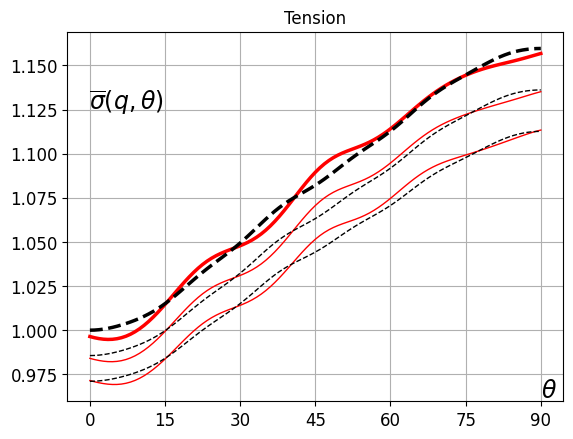

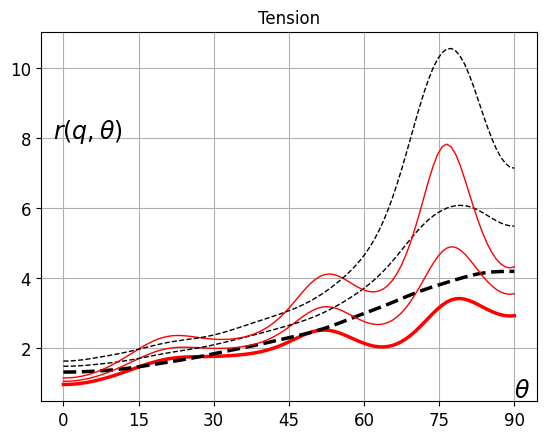

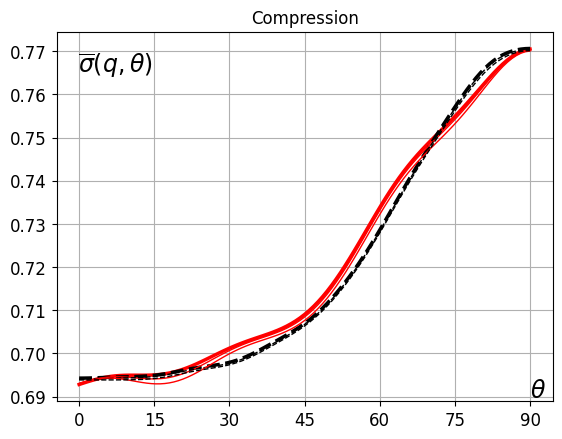

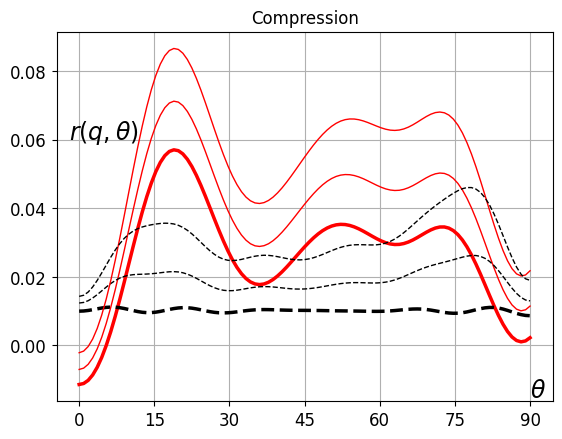

In [6]:
Nq=3
vq=np.linspace(0,-0.05,Nq) ###; print(vq)
vLW=np.ones(Nq);vLW[0]=2.5
Nphi=101
vone=np.ones(1)
vphi=np.linspace(0,np.pi/2,Nphi);vDegs=180.0*(vphi/np.pi)
vcos=np.cos(vphi);vsin=np.sin(vphi)
vcos2,vsin2,vsc=vcos*vcos,vsin*vsin,vcos*vsin
#vsx,vsy,vsxy=np.zeros(Nphi),np.zeros(Nphi),np.zeros(Nphi)
vS,vR, mxS,mnS = np.zeros(Nphi),np.zeros(Nphi), -1.0, 100.0
vSnn,vRnn = np.zeros(Nphi),np.zeros(Nphi)
vSc,vRc = np.zeros(Nphi),np.zeros(Nphi)
vSnnc,vRnnc = np.zeros(Nphi),np.zeros(Nphi)
linestyle1,linestyle2='--','-'
#fg,fg2=plt.figure(figsize=(15,7)),plt.figure(figsize=(15,7))
fgST,fgRT,fgSC,fgRC=plt.figure(),plt.figure(),plt.figure(),plt.figure()
axST,axRT,axSC,axRC=fgST.add_subplot(),fgRT.add_subplot(),fgSC.add_subplot(),fgRC.add_subplot()
#fg2ST,fg2RT,fg2SC,fg2RC=plt.figure(),plt.figure(),plt.figure(),plt.figure()
#baxST,baxRT,baxSC,baxRC=fg2ST.add_subplot(),fg2RT.add_subplot(),fg2SC.add_subplot(),fg2RC.add_subplot()
for kq in range(Nq):
    q=vq[kq];print('q = ',q)
    for k in range(Nphi):
        vsx=vcos2[k]+q*vsin2[k]
        vsy=vsin2[k]+q*vcos2[k]
        vsxy=(1.0-q)*vsc[k]
        yf,[vDX,vDY,vDXY]=yut.fGYF_SHYqp(vsx*vone,vsy*vone,vsxy*vone,vCoeff,ddMon,nQ,nP)
        if(k==0):print('check VDX:\n',vDX)
        vR[k]=(2*vDXY[0]*vsc[k]-vDX[0]*vsin2[k]-vDY[0]*vcos2[k])/(vDX[0]+vDY[0])
        vS[k]=1.0/yf[0]
        vp=np.array([vsx,vsy,vsxy]).reshape((1,3))
        x = tf.convert_to_tensor(vp, dtype=tf.float32)
        with tf.GradientTape() as tape:
            tape.watch(x)
            yf = model(x)
        vSnn[k]=1.0/yf**(1.0/nnHom)
        ##print(tape.gradient(yf, x))
        vDX,vDY,vDXY = tape.gradient(yf, x)[0]
        vRnn[k]=(vDXY*vsc[k]-vDX*vsin2[k]-vDY*vcos2[k])/(vDX+vDY)
        #---------------------
        yf,[vDX,vDY,vDXY]=yut.fGYF_SHYqp(-vsx*vone,-vsy*vone,-vsxy*vone,vCoeff,ddMon,nQ,nP)
        vRc[k]=(2*vDXY[0]*vsc[k]-vDX[0]*vsin2[k]-vDY[0]*vcos2[k])/(vDX[0]+vDY[0])
        vSc[k]=1.0/yf[0]
        x=-x
        with tf.GradientTape() as tape:
            tape.watch(x)
            yf = model(x)
        vSnnc[k]=1.0/yf**(1.0/nnHom)
        vDX,vDY,vDXY = tape.gradient(yf, x)[0]
        vRnnc[k]=(vDXY*vsc[k]-vDX*vsin2[k]-vDY*vcos2[k])/(vDX+vDY)
    axRT.plot(vDegs,vRnn,linestyle=linestyle2,linewidth=vLW[kq],color='r')
    axRT.plot(vDegs,vR,linestyle=linestyle1,linewidth=vLW[kq],color='k')
    axST.plot(vDegs,vSnn,linestyle=linestyle2,linewidth=vLW[kq],color='r')
    axST.plot(vDegs,vS,linestyle=linestyle1,linewidth=vLW[kq],color='k')
    axRC.plot(vDegs,vRnnc,linestyle=linestyle2,linewidth=vLW[kq],color='r')
    axRC.plot(vDegs,vRc,linestyle=linestyle1,linewidth=vLW[kq],color='k')
    axSC.plot(vDegs,vSnnc,linestyle=linestyle2,linewidth=vLW[kq],color='r')
    axSC.plot(vDegs,vSc,linestyle=linestyle1,linewidth=vLW[kq],color='k')
thetaTicks=[0,15,30,45,60,75,90]
thetaLabels=['0','15','30','45','60','75','90']
axST.set_xticks(thetaTicks,minor=False)
axST.tick_params(axis='both', which='major', labelsize=12)
axST.grid(True)
axRT.set_xticks(thetaTicks,minor=False)
axRT.tick_params(axis='both', which='major', labelsize=12)
axRT.grid(True)
y1,y2=axRT.get_ylim()
axRT.text(90,y1+0.01*(y2-y1),r'$\theta$',fontsize=17)
axRT.text(-2,8.0,r'$r(q,\theta)$',fontsize=17)
y1,y2=axST.get_ylim()
axST.text(90,y1+0.01*(y2-y1),r'$\theta$',fontsize=17)
axST.text(-0.2,1.125,r'$\overline{\sigma}(q,\theta)$',fontsize=17)
#fg.savefig('./NN_SRval_AZ31B_T_nb3.png',bbox_inches='tight',dpi=300,facecolor="w")
axSC.set_xticks(thetaTicks,minor=False)
axSC.tick_params(axis='both', which='major', labelsize=12)
axSC.grid(True)
axRC.set_xticks(thetaTicks,minor=False)
axRC.tick_params(axis='both', which='major', labelsize=12)
axRC.grid(True)
y1,y2=axRC.get_ylim()
axRC.text(90,y1+0.01*(y2-y1),r'$\theta$',fontsize=17)
axRC.text(-2,0.06,r'$r(q,\theta)$',fontsize=17)
y1,y2=axSC.get_ylim()
axSC.text(90,y1+0.01*(y2-y1),r'$\theta$',fontsize=17)
axSC.text(-0.2,0.765,r'$\overline{\sigma}(q,\theta)$',fontsize=17)
#
fgST.savefig(fSigmaT,format=frmt,bbox_inches='tight',dpi=300,facecolor="w")
fgSC.savefig(fSigmaC,format=frmt,bbox_inches='tight',dpi=300,facecolor="w")
fgRT.savefig(fRvalT,format=frmt,bbox_inches='tight',dpi=300,facecolor="w")
fgRC.savefig(fRvalC,format=frmt,bbox_inches='tight',dpi=300,facecolor="w")
#
axST.set_title('Tension');axRT.set_title('Tension');axSC.set_title('Compression');axRC.set_title('Compression')
plt.show()

In [7]:
### numerical estimates (Euclidean distances) of the approximation of the directional properties
Nq=3
vq=np.linspace(0,-0.05,Nq)
Nphi=14
vphi=np.linspace(0,np.pi/2,Nphi);vDegs=180.0*(vphi/np.pi)
vcos=np.cos(vphi);vsin=np.sin(vphi)
vcos2,vsin2,vsc=vcos*vcos,vsin*vsin,vcos*vsin
vS,vR = np.zeros(Nphi),np.zeros(Nphi)
vSnn,vRnn = np.zeros(Nphi),np.zeros(Nphi)
vSc,vRc = np.zeros(Nphi),np.zeros(Nphi)
vSnnc,vRnnc = np.zeros(Nphi),np.zeros(Nphi)
for kq in range(Nq):
    q=vq[kq]
    for k in range(Nphi):
        vsx=vcos2[k]+q*vsin2[k]
        vsy=vsin2[k]+q*vcos2[k]
        vsxy=(1.0-q)*vsc[k]
        yf,[vDX,vDY,vDXY]=yut.fGYF_SHYqp(vsx*vone,vsy*vone,vsxy*vone,vCoeff,ddMon,nQ,nP)
        vR[k]=(2.0*vDXY[0]*vsc[k]-vDX[0]*vsin2[k]-vDY[0]*vcos2[k])/(vDX[0]+vDY[0])
        vS[k]=1.0/yf
        vp=np.array([vsx,vsy,vsxy]).reshape((1,3))
        x = tf.convert_to_tensor(vp, dtype=tf.float32)
        with tf.GradientTape() as tape:
            tape.watch(x)
            yf = model(x)
        vSnn[k]=1.0/yf **(1.0/nnHom)
        vDX,vDY,vDXY = tape.gradient(yf, x)[0]
        vRnn[k]=(vDXY*vsc[k]-vDX*vsin2[k]-vDY*vcos2[k])/(vDX+vDY)
        ###---------------------------------------
        yf,[vDX,vDY,vDXY]=yut.fGYF_SHYqp(-vsx*vone,-vsy*vone,-vsxy*vone,vCoeff,ddMon,nQ,nP)
        vRc[k]=(2*vDXY[0]*vsc[k]-vDX[0]*vsin2[k]-vDY[0]*vcos2[k])/(vDX[0]+vDY[0])
        vSc[k]=1.0/yf[0]
        x=-x
        with tf.GradientTape() as tape:
            tape.watch(x)
            yf = model(x)
        vSnnc[k]=1.0/yf**(1.0/nnHom)
        vDX,vDY,vDXY = tape.gradient(yf, x)[0]
        vRnnc[k]=(vDXY*vsc[k]-vDX*vsin2[k]-vDY*vcos2[k])/(vDX+vDY)
deltaS=(vS-vSnn)**2+(vSc-vSnnc)**2
deltaS=np.sqrt(np.sum(deltaS))
deltaR=(vR-vRnn)**2+(vRc-vRnnc)**2
deltaR=np.sqrt(np.sum(deltaR))
print('deltaS = ',deltaS,'\ndeltaR = ',deltaR)

deltaS =  0.015491332924351016 
deltaR =  6.251817340417163


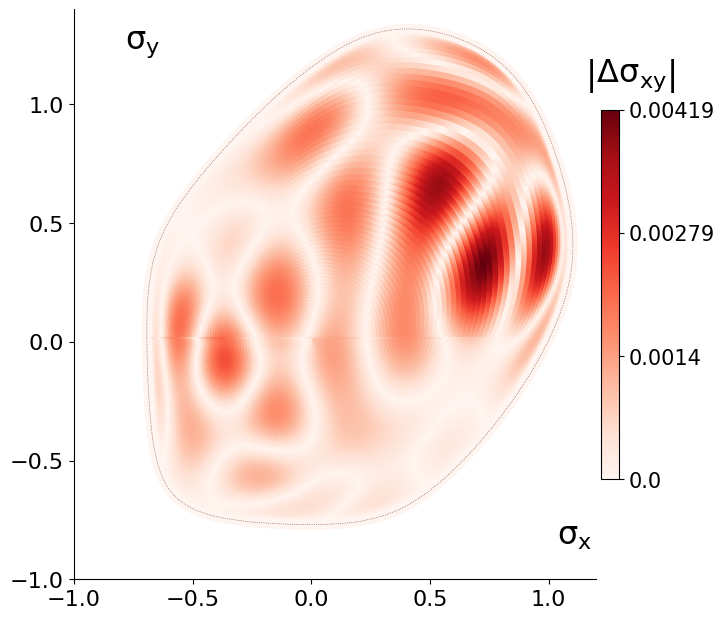

In [8]:
### Check the orthotropic symmetry gap
vp=yut.genSpherePointsTop(300).astype(np.float32)
yf=model(vp);rhoA=1.0/yf**(1.0/nnHom)
vp[:,2]=-vp[:,2]
yf=model(vp);rhoB=1.0/yf**(1.0/nnHom)
drho=np.abs((rhoA[:,0]-rhoB[:,0])*(-vp[:,2]))
fgg=plt.figure(figsize=(8,8))
axx=fgg.add_subplot()
axx.set_aspect('equal')
axx.spines[['right', 'top']].set_visible(False)
spl=axx.scatter(rhoA[:,0]*vp[:,0],rhoA[:,0]*vp[:,1],c=drho,cmap='Reds',rasterized=True)
cbticks=np.linspace(0,np.max(drho),4)
cbar=fgg.colorbar(spl,ax=axx, shrink=0.6,pad=0.0075,location='right')
##cbar.ax.set_title(r'$\left|\mathregular{\sigma_{xy}^T-\sigma_{xy}^B}\right|$',fontsize=23)
cbar.ax.set_title(r'$\,\,\,\,\,\,\,\,\left|\mathregular{\Delta\sigma_{xy}}\right|$',fontsize=23,pad=20)
cbar.set_ticks(cbticks);cbar.set_ticklabels([str(round(x,5)) for x in cbticks])
cbar.ax.tick_params(labelsize=15)
axx.tick_params(axis='both', which='major', labelsize=16)
y1,y2=axx.get_ylim()
x1,x2=axx.get_xlim()
axx.text(x=x2-0.08*(x2-x1),y=y1+0.01*(y2-y1),s=r'$\mathregular{\sigma_{x}}$',fontsize=23)
axx.text(x=x1+0.0*(x2-x1),y=y2-0.08*(y2-y1),s=r'$\mathregular{\sigma_{y}}$',fontsize=23)
npt=100
vsx=np.linspace(-1.0,1.2,npt)
vsy=np.linspace(-1.0,1.4,npt)
vsxy=maxSXY*np.array([0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.975,0.99,0.998])
X,Y=np.meshgrid(vsx,vsy)
npt2=npt*npt
X,Y=X.reshape((npt2,1)),Y.reshape((npt*npt,1))
vp=np.zeros((npt*npt,3))
vp[:,0]=X[:,0];vp[:,1]=Y[:,0]
vz=model(vp)
ccolr=[255,125,125];tcr=sum(ccolr);xcolr=[x/tcr for x in ccolr]
##axx.contour(vsx,vsy,tf.reshape(vz,(npt,npt)),levels=[1.0],linestyles='dotted',linewidths=0.5,colors=[(255,125,125)])
axx.contour(vsx,vsy,tf.reshape(vz,(npt,npt)),levels=[1.0],linestyles='dotted',linewidths=0.5,colors=[xcolr])
fgg.savefig(fOrtoSymm,format=frmt,bbox_inches='tight',dpi=300,facecolor='w')
plt.show()

shapes of vals, grad, hess:  (157744, 1) (157744, 3) (157744, 6)
min KG =  0.047485147


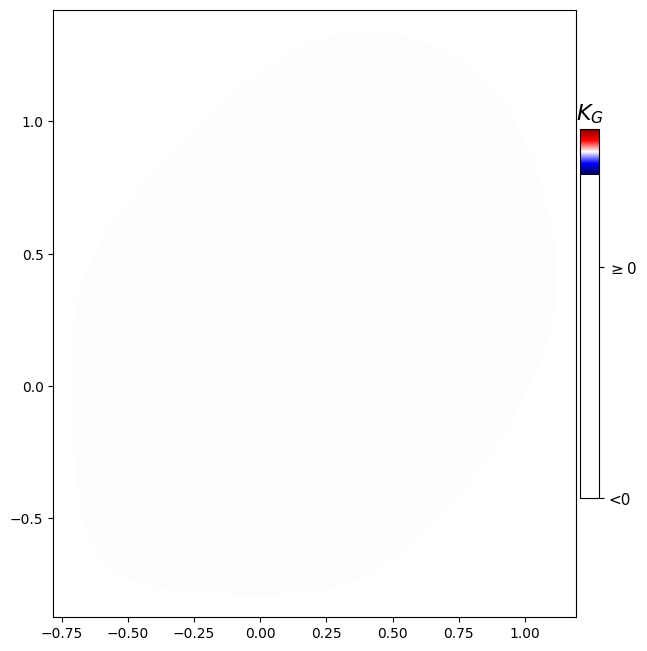

In [9]:
##generate points on the unit sphere
vp=yut.genPointsCvxCheckOpt(10**5).astype(np.float32)
ncp=vp.shape[0]

##calculate value, gradient and hessian
x1=tf.Variable(vp[:,0],name='x1',trainable=False)
x2=tf.Variable(vp[:,1],name='x2',trainable=False)
x3=tf.Variable(vp[:,2],name='x3',trainable=False)

with tf.GradientTape(persistent=True) as tape2:
    tape2.watch([x1,x2,x3])
    with tf.GradientTape() as tape1:
        tape1.watch([x1,x2,x3])
        vy=model(tf.stack([x1,x2,x3],axis=1))
    g1,g2,g3=tape1.gradient(vy,[x1,x2,x3])
    idx=np.argwhere(vp[:,2]>=-1.0e-12)
    vp=vp[idx[:,0]]
    vpy=model(vp)


h11=tape2.gradient(g1,x1,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
h12=tape2.gradient(g1,x2,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
h13=tape2.gradient(g1,x3,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
h22=tape2.gradient(g2,x2,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
h23=tape2.gradient(g2,x3,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()
h33=tape2.gradient(g3,x3,unconnected_gradients=tf.UnconnectedGradients.ZERO).numpy()

vy=vy.numpy().reshape((ncp,1))
vG=np.column_stack((g1.numpy(),g2.numpy(),g3.numpy()))
vH=np.column_stack((h11,h12,h13,h22,h23,h33))
print('shapes of vals, grad, hess: ', vy.shape,vG.shape,vH.shape)
nHom=10
KG=yut.HomN_GaussCheck(vy,vG,vH,nHom)
print('min KG = ',np.min(KG))


ncp=vp.shape[0]
vpy=vpy.numpy().reshape((ncp,1))
vpy=vpy**(1.0/nHom)
nKG=idx.shape[0]
KG=KG[idx[:,0]] #;KG/=np.max(KG)
idx=np.argwhere(KG<0)
KG=np.ones(nKG)
KG[idx[:,0]]=-1
if(1):
    fg3=plt.figure(figsize=(8,8))
    ax=fg3.add_subplot()
    ax.set_aspect('equal')
    spl=ax.scatter(vp[:,0]/vpy[:,0],vp[:,1]/vpy[:,0],c=KG, cmap='seismic')
    cbar=fg3.colorbar(spl,ax=ax, shrink=0.6,pad=0.0075,location='right')
    #cbar.ax.set_ylim(-2.0, 10.0)
    #cbar.outline.set_visible(False)
    #vticks=np.linspace(np.min(KG),np.max(KG),6)
    #cbar.set_ticks(vticks)
    #cbar.set_ticklabels([str(round(x,2)) for x in vticks],fontsize=11)
    vticks=[-0.5,0.5]
    cbar.set_ticks(vticks)
    cbar.set_ticklabels(['<0',r'$\geq 0$'],fontsize=11)
    ##cbar.ax.set_title(r'$\mathregular{\sigma_{xy}}$',fontsize=15)
    cbar.ax.set_title(r'$K_G$',fontsize=16)
    plt.show()
del tape2

In [11]:
!jupyter nbconvert --to html  {wdir+'nb15_Valid.ipynb'}

[NbConvertApp] Converting notebook /content/drive/MyDrive/ysNN/partA/nb15_Valid.ipynb to html
[NbConvertApp] Writing 1435831 bytes to /content/drive/MyDrive/ysNN/partA/nb15_Valid.html
